In [70]:
import torch
from IPython import display
from d2l import torch as d2l

batch_size = 256
train_iter, test_iter = d2l.load_data_fashion_mnist(batch_size)

In [71]:
num_inputs = 784 # 28 * 28
num_outputs = 10 # 10类
w = torch.normal(0,0.01,size=(num_inputs,num_outputs),requires_grad=True)
b = torch.zeros(num_outputs,requires_grad=True)
w.shape

torch.Size([784, 10])

In [72]:
x = torch.tensor([[1.0,2.0,3.0],[4.0,5.0,6.0]])
print(x.shape)
x.sum(0,keepdim=True),x.sum(1,keepdim=True)

torch.Size([2, 3])


(tensor([[5., 7., 9.]]),
 tensor([[ 6.],
         [15.]]))

In [73]:
def softmax(x):
    x_exp = torch.exp(x)
    partition = x_exp.sum(1,keepdim=True)
    return x_exp / partition

In [74]:
x = torch.normal(0,1,(2,5))
x_prob = softmax(x)
x_prob,x_prob.sum(1)

(tensor([[0.1903, 0.0801, 0.0603, 0.2193, 0.4499],
         [0.4858, 0.0619, 0.0581, 0.0433, 0.3509]]),
 tensor([1.0000, 1.0000]))

In [75]:
def net(x):
    print(f'x.shape{x.shape}')
    return softmax(torch.matmul(x.reshape(-1,w.shape[0]),w) + b)

In [76]:
y = torch.tensor([0,2])
y_hat = torch.tensor([[0.1,0.3,0.6],[0.3,0.3,0.5]])
y_hat[[0,1],y]

tensor([0.1000, 0.5000])

In [77]:
def cross_entropy(y_hat,y):
    return -torch.log(y_hat[range(len(y_hat)),y])
cross_entropy(y_hat,y)

tensor([2.3026, 0.6931])

In [78]:
def accuracy(y_hat,y):
    if len(y_hat.shape) > 1 and y_hat.shape[1] > 1:
        y_hat = y_hat.argmax(axis = 1)
        print(y_hat)
    cmp = y_hat.type(y.dtype) == y
    print(cmp)
    return float(cmp.type(y.dtype).sum())
accuracy(y_hat,y) / len(y)

tensor([2, 2])
tensor([False,  True])


0.5

In [79]:
class Accumulator:
    def __init__(self,n) -> None:
        self.data = [0.0] * n
    def add(self,*args):
        self.data = [a + float(b) for a,b in zip (self.data,args)]
    def reset(self):
        self.data = [0.0] * len(self.data)
    def __getitem__(self,idx):
        return self.data[idx]

In [80]:
def evaluate_accuracy(net,data_iter):
    if isinstance(net,torch.nn.Module):
        net.eval()
    metric = Accumulator(2)
    for x,y in data_iter:
        metric.add(accuracy(net(x),y),y.numel())
        print(accuracy(net(x),y))
        print(y.numel())
    return metric[0] / metric[1]

In [81]:
evaluate_accuracy(net,test_iter)

x.shapetorch.Size([256, 1, 28, 28])
tensor([5, 3, 3, 2, 3, 3, 1, 2, 2, 2, 5, 4, 2, 8, 5, 2, 2, 6, 5, 2, 2, 2, 8, 5,
        8, 3, 3, 2, 8, 2, 1, 6, 8, 2, 3, 4, 8, 2, 2, 5, 2, 3, 2, 5, 3, 5, 3, 2,
        8, 3, 6, 1, 4, 5, 1, 6, 2, 1, 8, 4, 3, 5, 8, 8, 8, 2, 2, 8, 8, 1, 3, 2,
        5, 2, 3, 3, 2, 5, 8, 3, 2, 8, 5, 5, 4, 2, 8, 2, 3, 6, 5, 2, 3, 2, 2, 8,
        3, 2, 3, 8, 8, 3, 3, 8, 2, 5, 2, 8, 5, 8, 1, 2, 2, 3, 5, 5, 2, 3, 2, 8,
        2, 2, 5, 5, 2, 2, 8, 8, 2, 5, 3, 8, 5, 3, 5, 8, 3, 2, 3, 4, 2, 2, 3, 2,
        3, 2, 2, 8, 3, 3, 2, 2, 2, 2, 2, 6, 2, 2, 5, 2, 5, 3, 2, 5, 3, 5, 8, 8,
        5, 3, 2, 8, 8, 8, 6, 3, 2, 2, 5, 2, 2, 8, 2, 8, 3, 5, 1, 3, 3, 3, 2, 1,
        3, 3, 8, 8, 2, 2, 6, 2, 2, 2, 3, 8, 1, 3, 3, 3, 5, 6, 8, 2, 8, 8, 2, 3,
        2, 1, 3, 8, 8, 8, 2, 3, 4, 3, 2, 3, 3, 3, 4, 2, 5, 6, 5, 2, 5, 2, 8, 8,
        5, 5, 5, 2, 8, 8, 3, 8, 8, 5, 5, 2, 2, 4, 5, 8])
tensor([False, False, False, False, False, False, False, False, False, False,
        False, False, False, 

0.1015

In [82]:
class Animator:
    def __init__(self, xlabel=None, ylabel=None, legend=None, xlim=None,
                ylim=None, xscale='linear',yscale='linear',
                fmts=('-','m--','g-.','r:'),nrows=1,ncols=1,
                figsize=(3.5,2.5)): 
        if legend is None:
            legend = []
        d2l.use_svg_display()
        self.fig, self.axes = d2l.plt.subplots(nrows,ncols,figsize=figsize)
        if nrows * ncols == 1:
            self.axes = [self.axes,]
        self.config_axes = lambda: d2l.set_axes(self.axes[0],xlabel,ylabel,xlim,ylim,xscale,yscale,legend)         
        self.X, self.Y, self.fmts = None, None, fmts
        
    def add(self, x, y):
        if not hasattr(y, "__len__"):
            y = [y]
        n = len(y)
        if not hasattr(x, "__len__"):
            x = [x] * n
        if not self.X:
            self.X = [[] for _ in range(n)] 
        if not self.Y:
            self.Y = [[] for _ in range(n)]
        for i, (a,b) in enumerate(zip(x,y)):
            if a is not None and b is not None:
                self.X[i].append(a)
                self.Y[i].append(b)
        self.axes[0].cla()
        for x, y, fmt in zip(self.X, self.Y, self.fmts):
            self.axes[0].plot(x, y, fmt)
        self.config_axes()
        display.display(self.fig)
        display.clear_output(wait=True)

In [83]:
class Animator:
    def __init__(self, xlabel=None, ylabel=None, legend=None, xlim=None,
                ylim=None, xscale='linear',yscale='linear',
                fmts=('-','m--','g-.','r:'),nrows=1,ncols=1,
                figsize=(3.5,2.5)): 
        if legend is None:
            legend = []
        d2l.use_svg_display()
        self.fig, self.axes = d2l.plt.subplots(nrows,ncols,figsize=figsize)
        if nrows * ncols == 1:
            self.axes = [self.axes,]
        self.config_axes = lambda: d2l.set_axes(self.axes[0],xlabel,ylabel,xlim,ylim,xscale,yscale,legend)         
        self.X, self.Y, self.fmts = None, None, fmts
        
    def add(self, x, y):
        if not hasattr(y, "__len__"):
            y = [y]
        n = len(y)
        if not hasattr(x, "__len__"):
            x = [x] * n
        if not self.X:
            self.X = [[] for _ in range(n)] 
        if not self.Y:
            self.Y = [[] for _ in range(n)]
        for i, (a,b) in enumerate(zip(x,y)):
            if a is not None and b is not None:
                self.X[i].append(a)
                self.Y[i].append(b)
        self.axes[0].cla()
        for x, y, fmt in zip(self.X, self.Y, self.fmts):
            self.axes[0].plot(x, y, fmt)
        self.config_axes()
        display.display(self.fig)
        display.clear_output(wait=True)

In [84]:
def train_epoch_ch3(net,train_iter,loss,updater):
    if isinstance(net,torch.nn.Module):
        net.train()
    metric = Accumulator(3)
    for x,y in train_iter:
        y_hat = net(x)
        l = loss(y_hat,y)
        if isinstance(updater,torch.optim.Optimizer):
            updater.zero_grad()
            l.backward()
            updater.step()
            metric.add(
                float(l) * len(y),accuracy(y_hat,y),
                y.size().numel()
            )
        else:
            l.sum().backward()
            updater(x.shape[0])
            metric.add(float(l.sum()),accuracy(y_hat,y),y.numel()) 
    return metric[0] / metric[2] , metric[1] / metric[2]

In [85]:
def train_ch3(net,train_iter,test_iter,loss,num_epochs,updater):
    animator = Animator(xlabel='epoch',xlim=[1,num_epochs],ylim=[0.3,0.9],       
                       legend=['train loss','train acc','test acc'])
    for epoch in range(num_epochs):  # 变量num_epochs遍数据
        train_metrics = train_epoch_ch3(net,train_iter,loss,updater) # 返回两个值，一个总损失、一个总正确率
        test_acc = evaluate_accuracy(net, test_iter) # 测试数据集上评估精度，仅返回一个值，总正确率  
        animator.add(epoch+1,train_metrics+(test_acc,)) # train_metrics+(test_acc,) 仅将两个值的正确率相加，
    train_loss, train_acc = train_metrics

In [86]:
lr = 0.1

def updater(batch_size):
    return d2l.sgd([w,b],lr,batch_size)

x.shapetorch.Size([256, 1, 28, 28])
tensor([1, 4, 7, 3, 0, 5, 4, 0, 2, 1, 0, 3, 7, 9, 2, 9, 9, 4, 9, 1, 0, 0, 0, 4,
        1, 3, 8, 8, 9, 4, 1, 4, 7, 8, 5, 0, 0, 2, 3, 3, 5, 6, 2, 6, 4, 6, 0, 1,
        4, 0, 3, 2, 8, 1, 1, 3, 8, 3, 4, 0, 3, 6, 7, 1, 0, 8, 2, 9, 7, 0, 6, 4,
        6, 0, 0, 6, 9, 9, 2, 6, 5, 4, 4, 6, 2, 5, 6, 5, 7, 0, 0, 7, 4, 4, 8, 2,
        5, 0, 2, 1, 4, 4, 6, 5, 2, 6, 9, 7, 6, 5, 8, 4, 2, 8, 9, 1, 3, 0, 4, 9,
        4, 8, 2, 4, 2, 0, 2, 3, 0, 6, 9, 8, 2, 3, 6, 3, 0, 5, 6, 0, 4, 4, 7, 0,
        8, 0, 1, 4, 5, 5, 0, 8, 1, 3, 2, 5, 7, 4, 9, 3, 3, 9, 1, 9, 0, 8, 9, 6,
        9, 2, 1, 9, 7, 8, 2, 1, 5, 0, 5, 0, 4, 9, 8, 1, 0, 3, 8, 4, 3, 4, 6, 3,
        0, 3, 5, 6, 5, 1, 1, 0, 6, 8, 2, 1, 3, 3, 6, 4, 4, 4, 6, 9, 6, 3, 1, 3,
        4, 7, 2, 6, 6, 4, 0, 9, 9, 7, 3, 4, 5, 5, 1, 3, 9, 0, 7, 7, 5, 2, 1, 4,
        6, 9, 1, 9, 7, 4, 1, 5, 4, 6, 8, 4, 1, 5, 6, 6])
tensor([ True, False,  True, False,  True,  True, False,  True,  True,  True,
         True, False,  True, 

KeyboardInterrupt: 

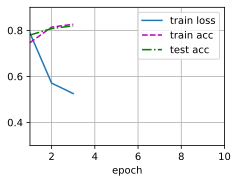

In [87]:
num_epochs = 10
train_ch3(net,train_iter,test_iter,cross_entropy,num_epochs,updater)